In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as PLT
import seaborn as SB
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

In [78]:
DF = pd.read_csv('../../datasets/BTC-USD.csv',usecols=['Date','Adj Close']).rename(
    columns={'Date':'date','Adj Close':'price'})
DF['date'] = pd.DatetimeIndex(DF['date'])

In [79]:
GRPS = DF.resample(rule='W', on='date')['price'].mean()
DFW = pd.concat([pd.Series(GRPS.keys()),pd.Series(GRPS.values,name='price')],axis=1)
DFW = DFW.rename(columns={'date':'ds','price':'y'})

<AxesSubplot:xlabel='ds'>

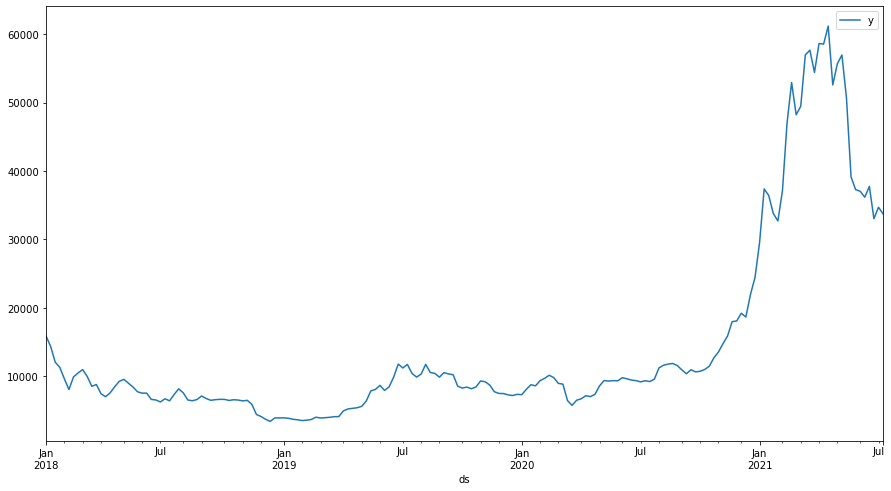

In [80]:
DFW.plot(figsize=(15,8),x='ds')

15:33:44 - cmdstanpy - INFO - Chain [1] start processing
15:33:45 - cmdstanpy - INFO - Chain [1] done processing


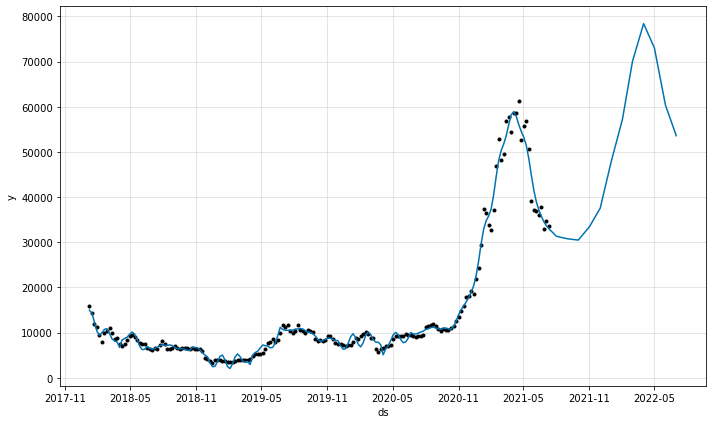

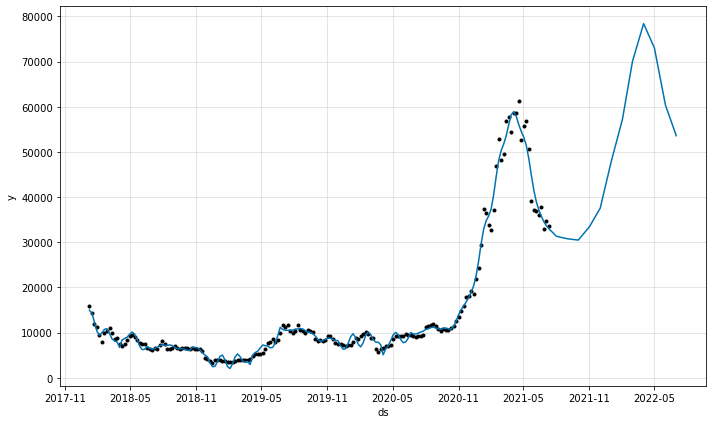

In [81]:
p = Prophet(changepoint_prior_scale=2)
p.fit(DFW)
future = p.make_future_dataframe(periods=12,freq='MS')
predict = p.predict(future)
p.plot(predict,uncertainty=False)